In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

This dataset provides detailed sales information for BMW vehicles from 2010 to 2024 across global regions. It includes attributes such as model, year, engine size, mileage, transmission type, fuel type, price, and sales volume. Scholars and analysts can use it to explore market trends, pricing approaches, and customer favorites.

|Column Name|Info|
|-|-|
|Model|The name of the BMW vehicle (e.g., 3 Series, X5, i8), representing different product lines. Helps analyze sales|
|Year|The year of sale between 2010 and 2024. Useful for identifying changes in demand and market performance over time.ear of sale between 2010 and 2024. Useful for identifying changes in demand and market performance over time.|
|Region|The geographic market where the vehicle was sold (e.g., Asia, Europe, North America). Allows regional sales comparison.|
|Color|The exterior color of the car. Can be used to study customer preferences and market demand for specific colors.|
|Fuel_Type|Indicates the fuel system (Petrol, Diesel, Hybrid, Electric). Helps in tracking adoption of alternative fuel vehicles|
|Transmission|Specifies whether the vehicle has a Manual or Automatic transmission. Useful for trend analysis of consumer choices.|
|Engine_Size_L|Engine capacity in liters. Provides insights into performance preferences and their relation to pricing and sales.|
|Mileage_KM|The distance driven in kilometers. Helps in evaluating vehicle usage and its impact on resale value and price.|
|Price_USD|The price of the car in US dollars. Central for analyzing affordability, market positioning, and sales volume.|
|Sales_Volume|NNumber of units sold for the given vehicle entry. Key for studying popularity and market demand of different models.umber of units sold for the given vehicle entry. Key for studying popularity and market demand of different models.|
|Sales_Classification|Sales Classification|

## Loading the csv as a dataframe

In [2]:
df = pd.read_csv("/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv")
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


## Check the dataframe for null values and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


## Since the Engine_Size_L column should be categorical value, converting it to string

In [4]:
# Since the Engine_Size_L column should be categorical value, converting it to string
# df["Engine_Size_L"] = df["Engine_Size_L"].astype("str")

## Adding a new column Total_sales which is total amount made from selling the cars

In [5]:
df["total_sales"] = df["Price_USD"] * df["Sales_Volume"]
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,total_sales
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


## Total sales of cars by models

In [6]:
most_revenue = df.groupby(by=["Model"], as_index=False).agg({"total_sales": "sum"})
most_revenue = most_revenue.rename(columns={"total_sales": "Revenue"})
most_revenue = most_revenue.sort_values(by=["Revenue"], ascending=False)
most_revenue["Revenue_billions"] = most_revenue["Revenue"]/1_000_000_000
most_revenue

,Model,Revenue,Revenue_billions
2,7 Series,1790070249282,1790.070249
0,3 Series,1768534028214,1768.534028
10,i8,1764743448529,1764.743449
5,X1,1752985285361,1752.985285
1,5 Series,1735712423092,1735.712423
9,i3,1724197530210,1724.197530
7,X5,1708653383772,1708.653384
6,X3,1707951188482,1707.951188
4,M5,1698467355916,1698.467356
8,X6,1693423254979,1693.423255


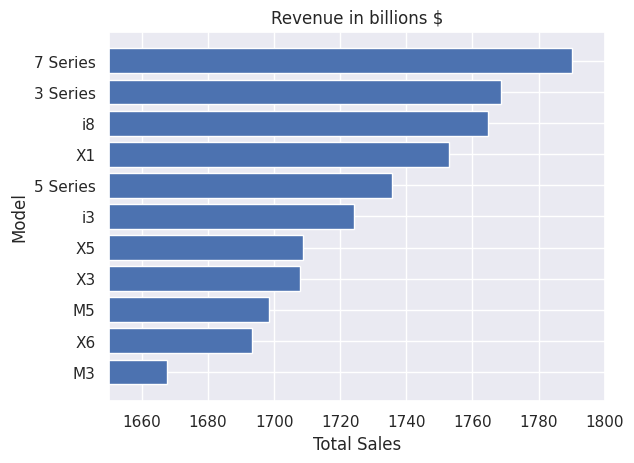

In [7]:
fig, ax = plt.subplots()
ax.barh(most_revenue["Model"], most_revenue["Revenue_billions"])
ax.set_xlim(1650, 1800)
ax.invert_yaxis()

ax.set_title("Revenue in billions $")
ax.set_xlabel("Total Sales")
ax.set_ylabel("Model")

plt.show()

## Cars sold every year

In [8]:
cars_sold_year = df.groupby(by=["Year"], as_index=False).agg({"Sales_Volume": "sum"})
cars_sold_year["Sales_Volumn_Millions"] = cars_sold_year["Sales_Volume"] / 1_000_000
cars_sold_year

,Year,Sales_Volume,Sales_Volumn_Millions
0,2010,16933445,16.933445
1,2011,16758941,16.758941
2,2012,16751895,16.751895
3,2013,16866733,16.866733
4,2014,16958960,16.958960
5,2015,17010207,17.010207
6,2016,16957550,16.957550
7,2017,16620811,16.620811
8,2018,16412273,16.412273
9,2019,17191956,17.191956


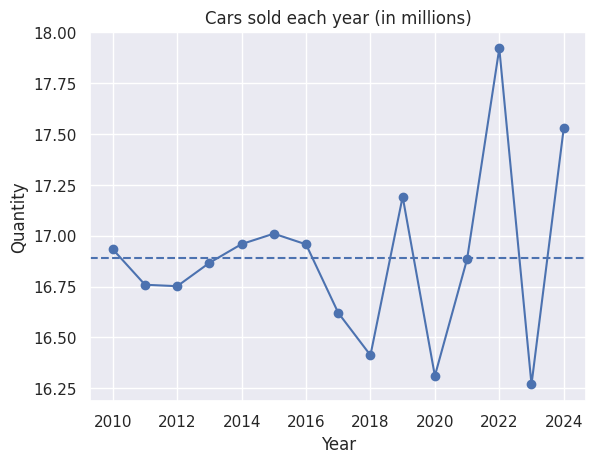

In [9]:
fig, ax = plt.subplots()

ax.axhline(cars_sold_year["Sales_Volumn_Millions"].mean(), ls="--")
ax.scatter(cars_sold_year["Year"], cars_sold_year["Sales_Volumn_Millions"])
ax.plot(cars_sold_year["Year"], cars_sold_year["Sales_Volumn_Millions"])

ax.set_title("Cars sold each year (in millions)")
ax.set_xlabel("Year")
ax.set_ylabel("Quantity")

plt.show()

## Cars sold every year by Fuel type

In [10]:
fuel_type_years = df.groupby(by=["Year", "Fuel_Type"]).agg({"Sales_Volume": "sum"})
fuel_type_years = fuel_type_years.rename(columns={"Sales_Volume": "Cars_sold"})
fuel_type_years = fuel_type_years.reset_index()
fuel_type_years.head()

,Year,Fuel_Type,Cars_sold
0,2010,Diesel,4086808
1,2010,Electric,4205554
2,2010,Hybrid,4415611
3,2010,Petrol,4225472
4,2011,Diesel,4019361


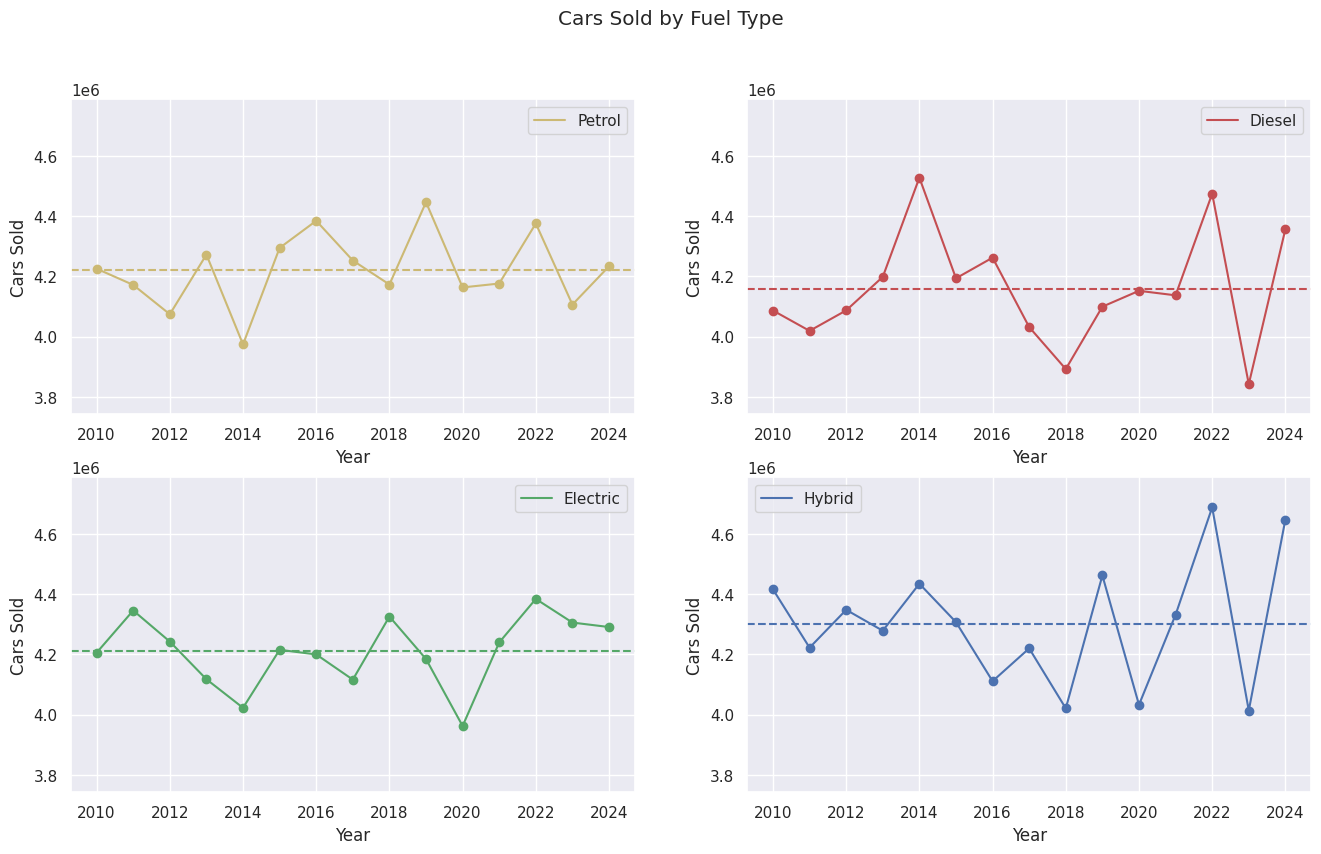

In [11]:
fuel_type_years_petrol = fuel_type_years[fuel_type_years["Fuel_Type"] == "Petrol"]
fuel_type_years_diesel = fuel_type_years[fuel_type_years["Fuel_Type"] == "Diesel"]
fuel_type_years_electric = fuel_type_years[fuel_type_years["Fuel_Type"] == "Electric"]
fuel_type_years_hybrid = fuel_type_years[fuel_type_years["Fuel_Type"] == "Hybrid"]

fig, ax = plt.subplots(2, 2, figsize=(16,9))

ax[0, 0].axhline(y=fuel_type_years_petrol["Cars_sold"].mean(), c="y", ls="--")
ax[0, 0].plot(fuel_type_years_petrol["Year"], fuel_type_years_petrol["Cars_sold"], label="Petrol", c="y")
ax[0, 0].scatter(fuel_type_years_petrol["Year"], fuel_type_years_petrol["Cars_sold"], c="y")
ax[0, 0].legend()
ax[0, 0].set_ylim(fuel_type_years["Cars_sold"].min()-100000, fuel_type_years["Cars_sold"].max()+100000)

ax[0, 1].axhline(y=fuel_type_years_diesel["Cars_sold"].mean(), c="r", ls="--")
ax[0, 1].plot(fuel_type_years_diesel["Year"], fuel_type_years_diesel["Cars_sold"], label="Diesel", c="r")
ax[0, 1].scatter(fuel_type_years_diesel["Year"], fuel_type_years_diesel["Cars_sold"], c="r")
ax[0, 1].legend()
ax[0, 1].set_ylim(fuel_type_years["Cars_sold"].min()-100000, fuel_type_years["Cars_sold"].max()+100000)

ax[1, 0].axhline(y=fuel_type_years_electric["Cars_sold"].mean(), c="g", ls="--")
ax[1, 0].plot(fuel_type_years_electric["Year"], fuel_type_years_electric["Cars_sold"], label="Electric", c="g")
ax[1, 0].scatter(fuel_type_years_electric["Year"], fuel_type_years_electric["Cars_sold"], c="g")
ax[1, 0].legend()
ax[1, 0].set_ylim(fuel_type_years["Cars_sold"].min()-100000, fuel_type_years["Cars_sold"].max()+100000)

ax[1, 1].axhline(y=fuel_type_years_hybrid["Cars_sold"].mean(), c="b", ls="--")
ax[1, 1].plot(fuel_type_years_hybrid["Year"], fuel_type_years_hybrid["Cars_sold"], label="Hybrid", c="b")
ax[1, 1].scatter(fuel_type_years_hybrid["Year"], fuel_type_years_hybrid["Cars_sold"], c="b")
ax[1, 1].legend()
ax[1, 1].set_ylim(fuel_type_years["Cars_sold"].min()-100000, fuel_type_years["Cars_sold"].max()+100000)

for i in ax.flat:
    i.set(xlabel='Year', ylabel='Cars Sold')

fig.suptitle("Cars Sold by Fuel Type")
plt.show()

## Number of cars sold based on engine size

In [12]:
engine_size_region = pd.DataFrame({"Engine_Size_L": df["Engine_Size_L"].unique()})
engine_size_region = engine_size_region.sort_values("Engine_Size_L").reset_index()
engine_size_region = engine_size_region.drop(["index"], axis=1)

In [13]:
regions = df["Region"].unique()

for region in regions:
    engine_size = df[df["Region"] == region].groupby(by=["Engine_Size_L"]).agg({"Engine_Size_L": "count"})
    engine_size = engine_size.rename(columns={"Engine_Size_L": f"Count_{region}"}).reset_index()
    engine_size.sort_values(by=["Engine_Size_L"], ascending=False)
    engine_size_region = pd.merge(left=engine_size_region, right=engine_size, on="Engine_Size_L")

In [14]:
engine_size_region.head()

,Engine_Size_L,Count_Asia,Count_North America,Count_Middle East,Count_South America,Count_Europe,Count_Africa
0,1.5,129,109,128,117,102,125
1,1.6,260,243,262,230,221,216
2,1.7,251,248,223,218,252,226
3,1.8,261,244,237,222,257,201
4,1.9,255,211,240,253,264,248


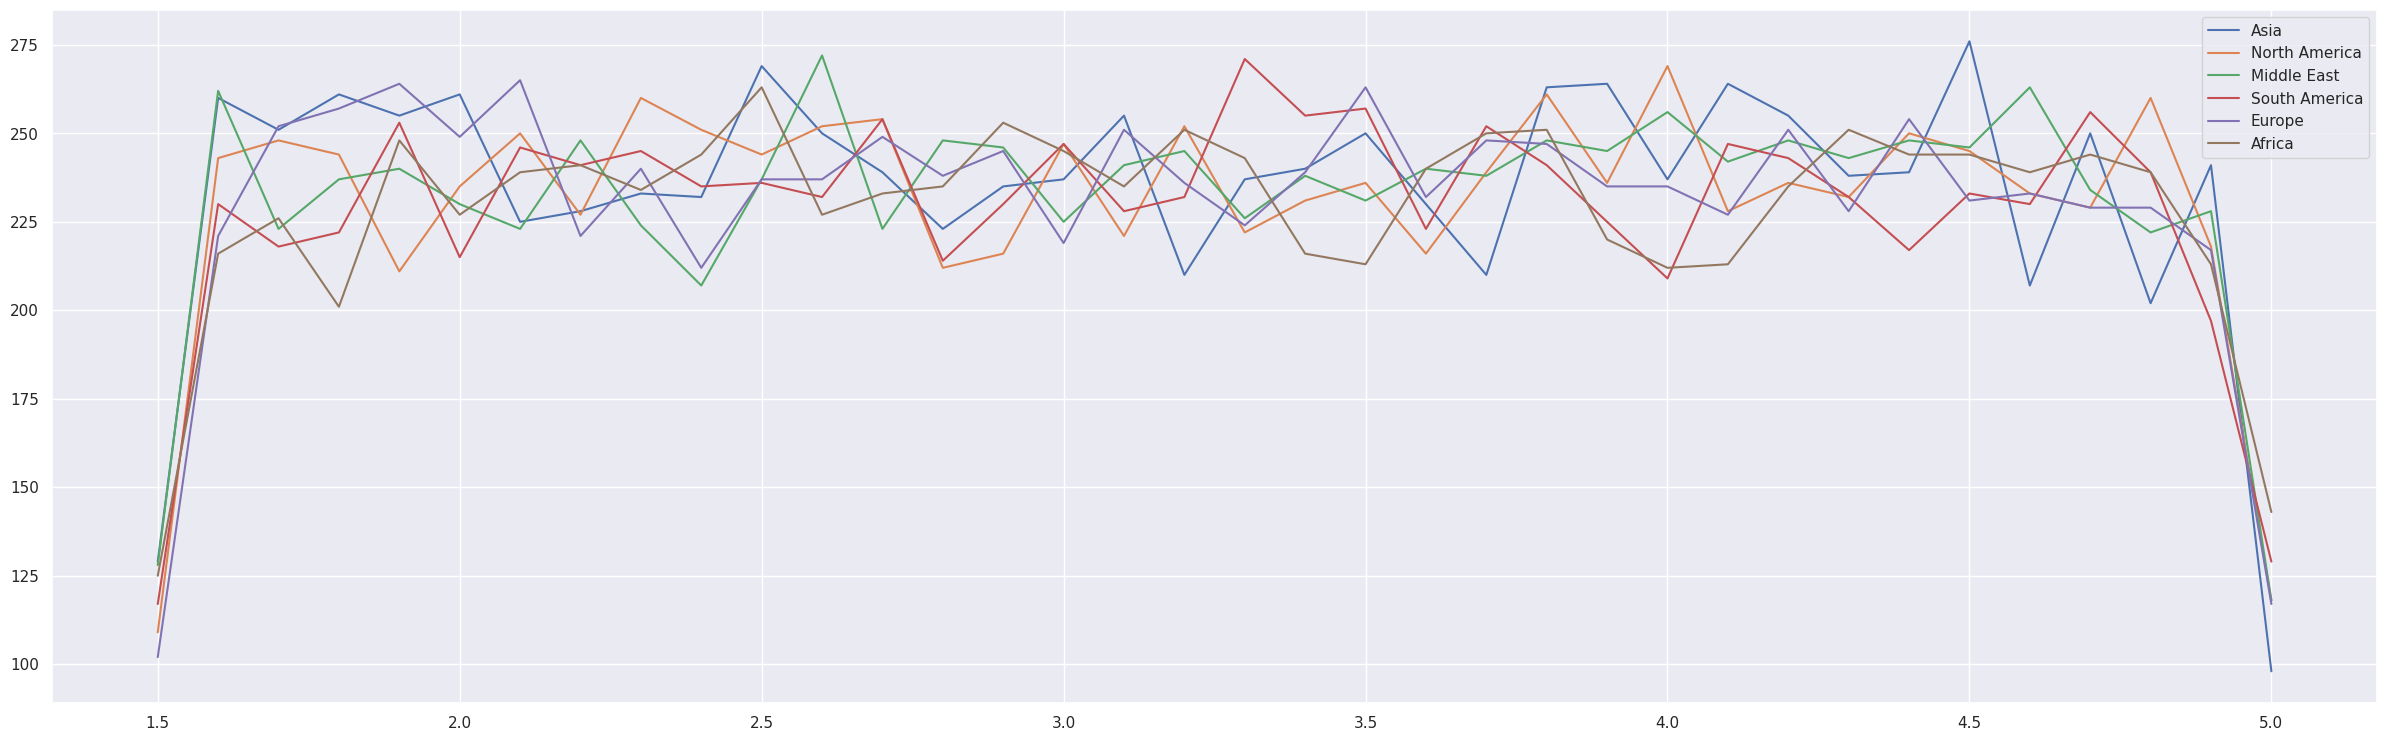

In [15]:
plt.figure(figsize=(30,9))
plt.plot(engine_size_region["Engine_Size_L"], engine_size_region["Count_Asia"], label="Asia")
plt.plot(engine_size_region["Engine_Size_L"], engine_size_region["Count_North America"], label="North America")
plt.plot(engine_size_region["Engine_Size_L"], engine_size_region["Count_Middle East"], label="Middle East")
plt.plot(engine_size_region["Engine_Size_L"], engine_size_region["Count_South America"], label="South America")
plt.plot(engine_size_region["Engine_Size_L"], engine_size_region["Count_Europe"], label="Europe")
plt.plot(engine_size_region["Engine_Size_L"], engine_size_region["Count_Africa"], label="Africa")

plt.legend()
plt.savefig("hello.png")
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
 11  total_sales           50000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB


In [17]:
## Splitting data into dependent and independent variables

In [18]:
x = df.iloc[:, :9].values
y = df.iloc[:, 10].values

In [19]:
x

array([['5 Series', 2016, 'Asia', ..., 3.5, 151748, 98740],
       ['i8', 2013, 'North America', ..., 1.6, 121671, 79219],
       ['5 Series', 2022, 'North America', ..., 4.5, 10991, 113265],
       ...,
       ['5 Series', 2010, 'Middle East', ..., 4.5, 174939, 46126],
       ['i3', 2020, 'Asia', ..., 3.8, 3379, 58566],
       ['X1', 2020, 'North America', ..., 3.3, 171003, 77492]],
      dtype=object)

In [20]:
y

array(['High', 'Low', 'Low', ..., 'High', 'High', 'Low'], dtype=object)

## Creating indices for numerical and non-numerical columns

In [21]:
x[0]

array(['5 Series', 2016, 'Asia', 'Red', 'Petrol', 'Manual', 3.5, 151748,
       98740], dtype=object)

In [22]:
non_numerical_columns = [0, 2, 3, 4, 5]
numerical_columns = [1, 6, 7, 8]

## Splitting the data for training and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

## Scaling numerical columns

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, numerical_columns] = sc.fit_transform(x_train[:, numerical_columns])

In [25]:
x_train

array([['5 Series', -1.159116724454048, 'Africa', ...,
        -0.24586664662671298, 0.8987860863926179, 1.6997351302032],
       ['i3', 1.6174462960513765, 'Africa', ..., -0.8413476108765712,
        0.3411453237444425, -0.9655320764382329],
       ['5 Series', -0.6963562210364772, 'Europe', ...,
        1.639823073497838, 0.8443884295177038, -0.29648698798906925],
       ...,
       ['i3', 0.2291647857986643, 'Asia', ..., -1.5360754025014056,
        0.5625190845739202, 0.9345083258050239],
       ['X5', 0.4605450375074497, 'Europe', ..., 0.4488611449981217,
        0.37885573497274916, 0.651227618663146],
       ['X1', 1.3860660443425912, 'Middle East', ...,
        -0.3451134740016894, 1.3982806079988876, 1.5713519448313857]],
      dtype=object)

## Label Encoding non-numerical columns

In [26]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}
for i in non_numerical_columns:
    le_dict[i] = LabelEncoder()
    x_train[:, i] = le_dict[i].fit_transform(x_train[:, i])
    # x_test[:, i] = le_dict[i].transform(x_test[:, i])

In [27]:
x_train

array([[1, -1.159116724454048, 0, ..., -0.24586664662671298,
        0.8987860863926179, 1.6997351302032],
       [9, 1.6174462960513765, 0, ..., -0.8413476108765712,
        0.3411453237444425, -0.9655320764382329],
       [1, -0.6963562210364772, 2, ..., 1.639823073497838,
        0.8443884295177038, -0.29648698798906925],
       ...,
       [9, 0.2291647857986643, 1, ..., -1.5360754025014056,
        0.5625190845739202, 0.9345083258050239],
       [7, 0.4605450375074497, 2, ..., 0.4488611449981217,
        0.37885573497274916, 0.651227618663146],
       [5, 1.3860660443425912, 3, ..., -0.3451134740016894,
        1.3982806079988876, 1.5713519448313857]], dtype=object)

## Applying one hot encoding to non-numerical columns

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
ct = ColumnTransformer([("onehot", OneHotEncoder(), [0, 2, 3, 4, 5])], remainder="passthrough", sparse_threshold=0)
x_train = ct.fit_transform(x_train)

In [30]:
x_train

array([[0.0, 1.0, 0.0, ..., -0.24586664662671298, 0.8987860863926179,
        1.6997351302032],
       [0.0, 0.0, 0.0, ..., -0.8413476108765712, 0.3411453237444425,
        -0.9655320764382329],
       [0.0, 1.0, 0.0, ..., 1.639823073497838, 0.8443884295177038,
        -0.29648698798906925],
       ...,
       [0.0, 0.0, 0.0, ..., -1.5360754025014056, 0.5625190845739202,
        0.9345083258050239],
       [0.0, 0.0, 0.0, ..., 0.4488611449981217, 0.37885573497274916,
        0.651227618663146],
       [0.0, 0.0, 0.0, ..., -0.3451134740016894, 1.3982806079988876,
        1.5713519448313857]], dtype=object)

In [31]:
y_train

array(['Low', 'Low', 'Low', ..., 'High', 'Low', 'High'], dtype=object)

In [32]:
le_class = LabelEncoder()
y_train = le_class.fit_transform(y_train)

In [33]:
y_train

array([1, 1, 1, ..., 0, 1, 0])

## Using random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## pre-processing test data for model prediction

In [35]:
for i in non_numerical_columns:
    x_test[:, i] = le_dict[i].transform(x_test[:, i])
x_test

array([[7, 2019, 0, ..., 1.6, 116627, 113879],
       [1, 2014, 2, ..., 3.1, 9825, 98093],
       [10, 2018, 4, ..., 4.9, 78070, 60222],
       ...,
       [4, 2024, 5, ..., 3.3, 189876, 92538],
       [8, 2010, 5, ..., 3.2, 193354, 119670],
       [2, 2021, 0, ..., 4.0, 115123, 118619]], dtype=object)

In [36]:
x_test[:, numerical_columns] = sc.transform(x_test[:, numerical_columns])
x_test

array([[7, 0.4605450375074497, 0, ..., -1.6353222298763819,
        0.2783349457205658, 1.4936918377866577],
       [1, -0.6963562210364772, 2, ..., -0.14661981925173653,
        -1.5666248985330333, 0.8870899328840964],
       [10, 0.2291647857986643, 4, ..., 1.639823073497838,
        -0.38772108988631443, -0.5681628696349016],
       ...,
       [4, 1.6174462960513765, 5, ..., 0.0518738354982159,
        1.5436807597664814, 0.6736303115909424],
       [8, -1.6218772278716187, 5, ..., -0.047372991876760105,
        1.6037617539268343, 1.7162201306595029],
       [2, 0.9233055409250205, 0, ..., 0.7466016271230506,
        0.2523539752728456, 1.675833800870285]], dtype=object)

In [37]:
x_test = ct.transform(x_test)
x_test

array([[0.0, 0.0, 0.0, ..., -1.6353222298763819, 0.2783349457205658,
        1.4936918377866577],
       [0.0, 1.0, 0.0, ..., -0.14661981925173653, -1.5666248985330333,
        0.8870899328840964],
       [0.0, 0.0, 0.0, ..., 1.639823073497838, -0.38772108988631443,
        -0.5681628696349016],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0518738354982159, 1.5436807597664814,
        0.6736303115909424],
       [0.0, 0.0, 0.0, ..., -0.047372991876760105, 1.6037617539268343,
        1.7162201306595029],
       [0.0, 0.0, 1.0, ..., 0.7466016271230506, 0.2523539752728456,
        1.675833800870285]], dtype=object)

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
y_pred = le_class.inverse_transform(y_pred)
y_pred

array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low'], dtype=object)

In [41]:
y_test

array(['High', 'Low', 'Low', ..., 'High', 'Low', 'Low'], dtype=object)

## Creating confusion matrix and calculting evaluation matrices

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

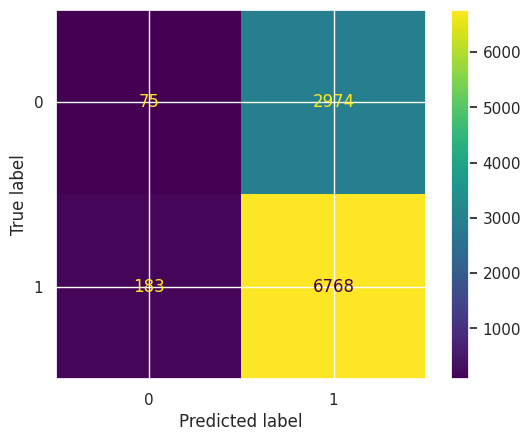

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"accuracy: {accuracy_score(le_class.transform(y_test), le_class.transform(y_pred))}")
print(f"precision: {precision_score(le_class.transform(y_test), le_class.transform(y_pred))}")
print(f"recall: {recall_score(le_class.transform(y_test), le_class.transform(y_pred))}")
print(f"f1 score: {f1_score(le_class.transform(y_test), le_class.transform(y_pred))}")

accuracy: 0.6843
precision: 0.6947238760008212
recall: 0.9736728528269314
f1 score: 0.810878811477865


## Notes
Since the dataset is imbalanced with majority of classes labelled as "High", a more balanced dataset would give more better results.